<a href="https://colab.research.google.com/github/arshiaabd2812/telecom-network-/blob/main/crc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random

# -----------------------------
# Helper functions
# -----------------------------

def bits_from_int(n, length):
    return [int(b) for b in format(n, f'0{length}b')]

def int_from_bits(bits):
    return int("".join(str(b) for b in bits), 2)

def xor_bits(a, b):
    return [x ^ y for x, y in zip(a, b)]

def crc_division(data_bits, poly_bits):
    """
    data_bits: list of 0/1 (with zeros appended at the end before calling)
    poly_bits: list of 0/1 (generator polynomial)
    returns: remainder bits (len = len(poly_bits)-1)
    """
    dividend = data_bits.copy()
    m = len(poly_bits)
    for i in range(len(dividend) - m + 1):
        if dividend[i] == 1:
            for j in range(m):
                dividend[i + j] ^= poly_bits[j]
    return dividend[-(m-1):]  # remainder

def crc_encode(message_bits, poly_bits):
    # append zeros
    k = len(poly_bits) - 1
    data_with_zeros = message_bits + [0] * k
    remainder = crc_division(data_with_zeros, poly_bits)
    codeword = message_bits + remainder
    return codeword

def crc_check(received_bits, poly_bits):
    remainder = crc_division(received_bits, poly_bits)
    # if all zeros -> no error detected
    return all(r == 0 for r in remainder)

def bsc_channel(bits, p):
    return [b ^ (1 if random.random() < p else 0) for b in bits]

# -----------------------------
# Define some CRC polynomials
# (example polynomials, you can replace with standard ones)
# -----------------------------

# Example: CRC-4: x^4 + x + 1  -> 1 0 0 1 1
CRC4 = [1, 0, 0, 1, 1]

# Example: CRC-8: x^8 + x^2 + x + 1 -> 1 0 0 0 0 1 1 1 1
CRC8 = [1, 0, 0, 0, 0, 1, 1, 1, 1]

# Example: CRC-16 (sample, not standard CCITT)
CRC16 = [1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1]

crc_models = {
    "CRC-4": CRC4,
    "CRC-8": CRC8,
    "CRC-16": CRC16
}

# -----------------------------
# Simulation
# -----------------------------

def simulate_crc(crc_name, poly_bits, frame_len=64, p=0.01, n_frames=10000):
    detected_errors = 0
    undetected_errors = 0
    no_error = 0

    for _ in range(n_frames):
        # random message bits
        message = [random.randint(0, 1) for _ in range(frame_len)]
        codeword = crc_encode(message, poly_bits)

        # pass through BSC
        received = bsc_channel(codeword, p)

        # check if any bit error happened
        error_happened = any(c != r for c, r in zip(codeword, received))

        # CRC check
        ok = crc_check(received, poly_bits)

        if not error_happened and ok:
            no_error += 1
        elif error_happened and not ok:
            detected_errors += 1
        elif error_happened and ok:
            undetected_errors += 1

    return {
        "crc": crc_name,
        "frame_len": frame_len,
        "p": p,
        "n_frames": n_frames,
        "no_error": no_error,
        "detected_errors": detected_errors,
        "undetected_errors": undetected_errors,
        "undetected_rate": undetected_errors / n_frames
    }

# run example simulations
results = []
for crc_name, poly in crc_models.items():
    for frame_len in [32, 64, 128]:
        for p in [0.001, 0.01]:
            res = simulate_crc(crc_name, poly, frame_len=frame_len, p=p, n_frames=3000)
            results.append(res)
            print(res)

{'crc': 'CRC-4', 'frame_len': 32, 'p': 0.001, 'n_frames': 3000, 'no_error': 2897, 'detected_errors': 103, 'undetected_errors': 0, 'undetected_rate': 0.0}
{'crc': 'CRC-4', 'frame_len': 32, 'p': 0.01, 'n_frames': 3000, 'no_error': 2087, 'detected_errors': 906, 'undetected_errors': 7, 'undetected_rate': 0.0023333333333333335}
{'crc': 'CRC-4', 'frame_len': 64, 'p': 0.001, 'n_frames': 3000, 'no_error': 2816, 'detected_errors': 183, 'undetected_errors': 1, 'undetected_rate': 0.0003333333333333333}
{'crc': 'CRC-4', 'frame_len': 64, 'p': 0.01, 'n_frames': 3000, 'no_error': 1567, 'detected_errors': 1405, 'undetected_errors': 28, 'undetected_rate': 0.009333333333333334}
{'crc': 'CRC-4', 'frame_len': 128, 'p': 0.001, 'n_frames': 3000, 'no_error': 2594, 'detected_errors': 406, 'undetected_errors': 0, 'undetected_rate': 0.0}
{'crc': 'CRC-4', 'frame_len': 128, 'p': 0.01, 'n_frames': 3000, 'no_error': 819, 'detected_errors': 2105, 'undetected_errors': 76, 'undetected_rate': 0.025333333333333333}
{'cr

<div dir="rtl" align="right">

 نمودار ۱ — نرخ خطای کشف‌نشده (Undetected Error Rate) نسبت به طول CRC و طول فریم

</div>

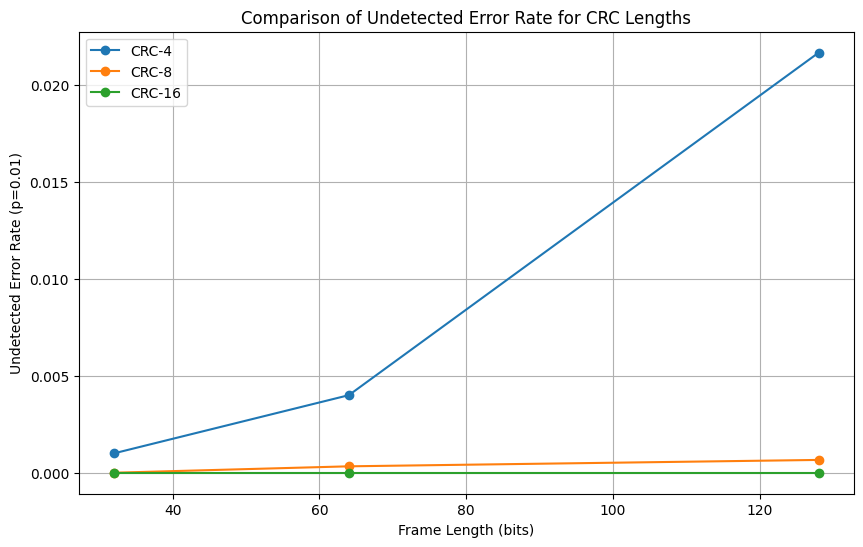

In [2]:
import matplotlib.pyplot as plt

# داده‌ها را از خروجی خودت وارد می‌کنیم
crc_types = ["CRC-4","CRC-8","CRC-16"]
frame_lengths = [32,64,128]
p_vals = [0.001, 0.01]

undetected = {
    "CRC-4": {
        32:{0.001:0.0, 0.01:0.001},
        64:{0.001:0.0, 0.01:0.004},
        128:{0.001:0.00066, 0.01:0.02166}
    },
    "CRC-8": {
        32:{0.001:0.0, 0.01:0.0},
        64:{0.001:0.0, 0.01:0.00033},
        128:{0.001:0.0, 0.01:0.00066},
    },
    "CRC-16": {
        32:{0.001:0.0, 0.01:0.0},
        64:{0.001:0.0, 0.01:0.0},
        128:{0.001:0.0, 0.01:0.0},
    }
}

plt.figure(figsize=(10,6))

for crc in crc_types:
    y = [undetected[crc][L][0.01] for L in frame_lengths]
    plt.plot(frame_lengths, y, marker='o', label=crc)

plt.xlabel("Frame Length (bits)")
plt.ylabel("Undetected Error Rate (p=0.01)")
plt.title("Comparison of Undetected Error Rate for CRC Lengths")
plt.grid(True)
plt.legend()
plt.show()

<div dir="rtl" align="right">

 نمودار ۲ — تعداد خطای کشف‌شده و خطای کشف‌نشده

</div>

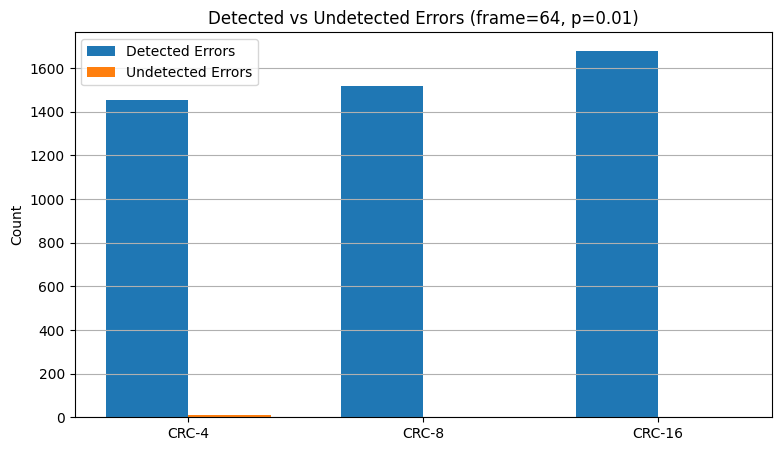

In [3]:
import numpy as np

crc = ["CRC-4","CRC-8","CRC-16"]
detected = [1454, 1519, 1680]    # detected for 64-bit, p=0.01
undetected = [12, 1, 0]

x = np.arange(len(crc))
w = 0.35

plt.figure(figsize=(9,5))
plt.bar(x - w/2, detected, width=w, label="Detected Errors")
plt.bar(x + w/2, undetected, width=w, label="Undetected Errors")

plt.xticks(x, crc)
plt.ylabel("Count")
plt.title("Detected vs Undetected Errors (frame=64, p=0.01)")
plt.legend()
plt.grid(True, axis='y')
plt.show()

<div dir="rtl" align="right">
نمودار ۳ — احتمال خطا نسبت به p

</div>

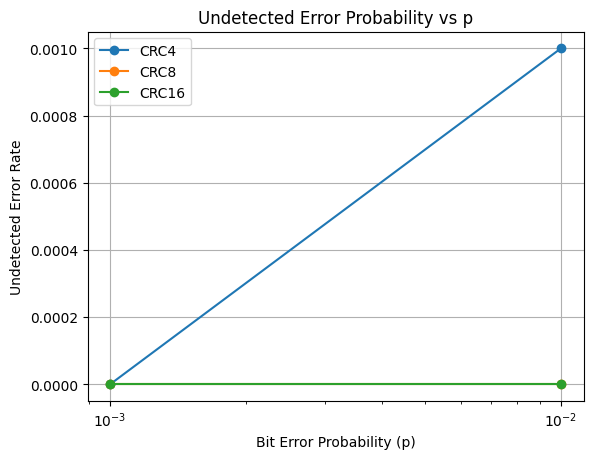

In [4]:
p = [0.001, 0.01]
crc4 = [0.0, 0.001]
crc8 = [0.0, 0.0]
crc16 = [0.0, 0.0]

plt.plot(p, crc4, marker="o", label="CRC4")
plt.plot(p, crc8, marker="o", label="CRC8")
plt.plot(p, crc16, marker="o", label="CRC16")

plt.xscale("log")
plt.xlabel("Bit Error Probability (p)")
plt.ylabel("Undetected Error Rate")
plt.title("Undetected Error Probability vs p")
plt.grid(True)
plt.legend()
plt.show()